Import Libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import os


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [60]:
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [61]:

data.drop_duplicates(inplace=True)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  918 non-null    int64  
 1   sex                  918 non-null    int64  
 2   chest pain type      918 non-null    int64  
 3   resting bps          918 non-null    int64  
 4   cholesterol          918 non-null    int64  
 5   fasting blood sugar  918 non-null    int64  
 6   resting ecg          918 non-null    int64  
 7   max heart rate       918 non-null    int64  
 8   exercise angina      918 non-null    int64  
 9   oldpeak              918 non-null    float64
 10  ST slope             918 non-null    int64  
 11  target               918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 93.2 KB


EDA

<Axes: ylabel='age'>

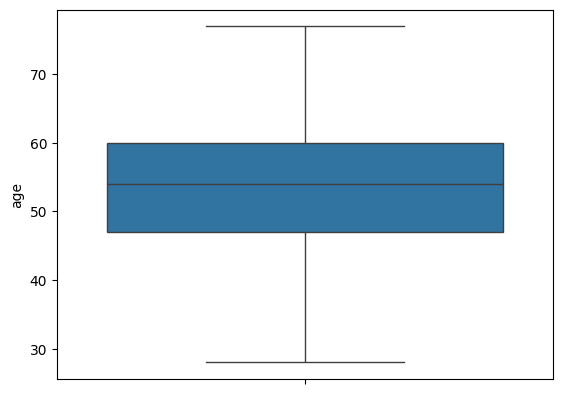

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=data['age'])
plt.show()

<Axes: ylabel='resting bps'>

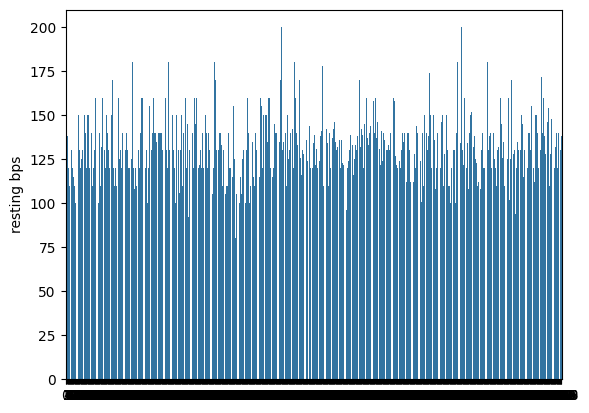

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=data['resting bps'])
plt.show()

<Axes: ylabel='resting ecg'>

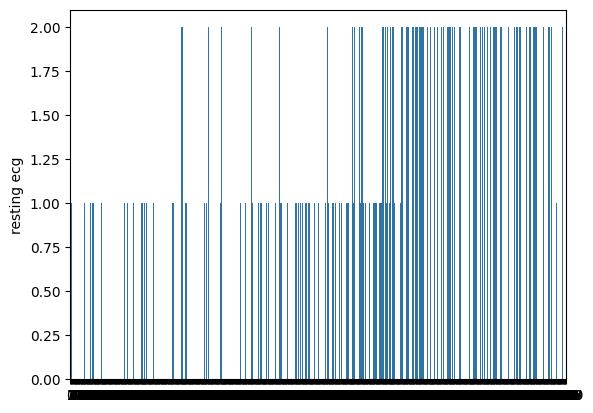

resting ecg
0    552
2    188
1    178
Name: count, dtype: int64

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=data['resting ecg'])
plt.show()

data['resting ecg'].value_counts()

In [66]:
print(data['resting ecg'].value_counts())
print(data['sex'].value_counts())
print(data['chest pain type'].value_counts())
print(data['fasting blood sugar'].value_counts())
print(data['exercise angina'].value_counts())
print(data['ST slope'].value_counts())

resting ecg
0    552
2    188
1    178
Name: count, dtype: int64
sex
1    725
0    193
Name: count, dtype: int64
chest pain type
4    496
3    203
2    173
1     46
Name: count, dtype: int64
fasting blood sugar
0    704
1    214
Name: count, dtype: int64
exercise angina
0    547
1    371
Name: count, dtype: int64
ST slope
2    459
1    395
3     63
0      1
Name: count, dtype: int64


In [67]:
data = data[data["ST slope"]!=0]
data.drop_duplicates()

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


Pre - Model Training Steps

In [68]:
data['chest pain type'] = data['chest pain type'].astype('object')
data['resting ecg'] = data['resting ecg'].astype('object')
data['ST slope'] = data['ST slope'].astype('object')
data['sex'] = data['sex'].astype('object')
data['fasting blood sugar'] = data['fasting blood sugar'].astype('object')
data['exercise angina'] = data['exercise angina'].astype('object')

cat_col = ['chest pain type', 'resting ecg', 'ST slope', 'sex', 'fasting blood sugar', 'exercise angina']

data_encoded = pd.get_dummies(data,columns=cat_col)


In [69]:
numeric_col = ['resting bps', 'cholesterol', 'max heart rate', 'oldpeak', 'age']
scaler = StandardScaler()
data[numeric_col] = scaler.fit_transform(data[numeric_col])

In [70]:
data_merged = pd.concat([data[numeric_col], data_encoded], axis=1)
y = data_merged['target']
X = data_merged.drop('target', axis=1)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [72]:
classifiers = [['Logistic Regression', LogisticRegression(C=0.1, max_iter=1000, random_state=42)],
               ['Support Vector Classifier', SVC()],
               ['Random Forest Classifier',RandomForestClassifier(n_estimators=70, max_depth=6, min_samples_split=22, random_state=42, max_features=3)],
               ['K-Neighbour Classifier', KNeighborsClassifier(metric='manhattan', weights='uniform', n_neighbors=3)],
               ['Decision Tree Classifier', DecisionTreeClassifier(random_state=42,max_features=8, min_samples_leaf=7, min_samples_split=46, min_impurity_decrease=0.0001)],
               ['Gradient Boosting Classifier', GradientBoostingClassifier(random_state=42, n_estimators=25, learning_rate=0.1)],
               ['Voting Classifier', VotingClassifier(estimators=[('Gradient Boost', GradientBoostingClassifier(random_state=42, n_estimators=25, learning_rate=0.1)), ('Support Vector Classifier', SVC()), ('Random Forest Classifier', RandomForestClassifier(n_estimators=70, max_depth=6, min_samples_split=22, random_state=42, max_features=3))], voting='hard')]    
               ]

for classifier in classifiers:
    model = classifier[1]
    print(model)
    model.fit(X_train, y_train)
    y_train_predicted = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_predicted)
    print(f'Train accuracy of {classifier[0]} is {train_accuracy}')
    
    y_test_predicted = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_predicted)
    print(f'Test accuracy of {classifier[0]} is {test_accuracy}\n \n')
    
    cr = classification_report(y_test_predicted, y_test)
    print(cr)
    classifier.append(train_accuracy)
    classifier.append(test_accuracy)


LogisticRegression(C=0.1, max_iter=1000, random_state=42)


LogisticRegression(C=0.1, max_iter=1000, random_state=42)

Train accuracy of Logistic Regression is 0.8581173260572987
Test accuracy of Logistic Regression is 0.8804347826086957
 

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        82
           1       0.86      0.93      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184

SVC()


SVC()

Train accuracy of Support Vector Classifier is 0.7244201909959073
Test accuracy of Support Vector Classifier is 0.7228260869565217
 

              precision    recall  f1-score   support

           0       0.77      0.63      0.69        91
           1       0.69      0.82      0.75        93

    accuracy                           0.72       184
   macro avg       0.73      0.72      0.72       184
weighted avg       0.73      0.72      0.72       184

RandomForestClassifier(max_depth=6, max_features=3, min_samples_split=22,
                       n_estimators=70, random_state=42)


RandomForestClassifier(max_depth=6, max_features=3, min_samples_split=22,
                       n_estimators=70, random_state=42)

Train accuracy of Random Forest Classifier is 0.9045020463847203
Test accuracy of Random Forest Classifier is 0.907608695652174
 

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        73
           1       0.93      0.92      0.92       111

    accuracy                           0.91       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.91      0.91      0.91       184

KNeighborsClassifier(metric='manhattan', n_neighbors=3)


KNeighborsClassifier(metric='manhattan', n_neighbors=3)

Train accuracy of K-Neighbour Classifier is 0.8608458390177354
Test accuracy of K-Neighbour Classifier is 0.7391304347826086
 

              precision    recall  f1-score   support

           0       0.78      0.64      0.71        90
           1       0.71      0.83      0.76        94

    accuracy                           0.74       184
   macro avg       0.75      0.74      0.74       184
weighted avg       0.75      0.74      0.74       184

DecisionTreeClassifier(max_features=8, min_impurity_decrease=0.0001,
                       min_samples_leaf=7, min_samples_split=46,
                       random_state=42)


DecisionTreeClassifier(max_features=8, min_impurity_decrease=0.0001,
                       min_samples_leaf=7, min_samples_split=46,
                       random_state=42)

Train accuracy of Decision Tree Classifier is 0.8553888130968622
Test accuracy of Decision Tree Classifier is 0.8532608695652174
 

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        79
           1       0.85      0.90      0.87       105

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

GradientBoostingClassifier(n_estimators=25, random_state=42)


GradientBoostingClassifier(n_estimators=25, random_state=42)

Train accuracy of Gradient Boosting Classifier is 0.8949522510231923
Test accuracy of Gradient Boosting Classifier is 0.8913043478260869
 

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        72
           1       0.92      0.90      0.91       112

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

VotingClassifier(estimators=[('Gradient Boost',
                              GradientBoostingClassifier(n_estimators=25,
                                                         random_state=42)),
                             ('Support Vector Classifier', SVC()),
                             ('Random Forest Classifier',
                              RandomForestClassifier(max_depth=6,
                                                     max_features=3,
                                                     min_samples_split=22,


VotingClassifier(estimators=[('Gradient Boost',
                              GradientBoostingClassifier(n_estimators=25,
                                                         random_state=42)),
                             ('Support Vector Classifier', SVC()),
                             ('Random Forest Classifier',
                              RandomForestClassifier(max_depth=6,
                                                     max_features=3,
                                                     min_samples_split=22,
                                                     n_estimators=70,
                                                     random_state=42))])

Train accuracy of Voting Classifier is 0.9004092769440655
Test accuracy of Voting Classifier is 0.8967391304347826
 

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        75
           1       0.91      0.92      0.91       109

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



<BarContainer object of 7 artists>

Text(72.28260869565217, 0, '72.28')

Text(73.91304347826086, 1, '73.91')

Text(85.32608695652173, 2, '85.33')

Text(88.04347826086956, 3, '88.04')

Text(89.13043478260869, 4, '89.13')

Text(89.67391304347827, 5, '89.67')

Text(90.76086956521739, 6, '90.76')

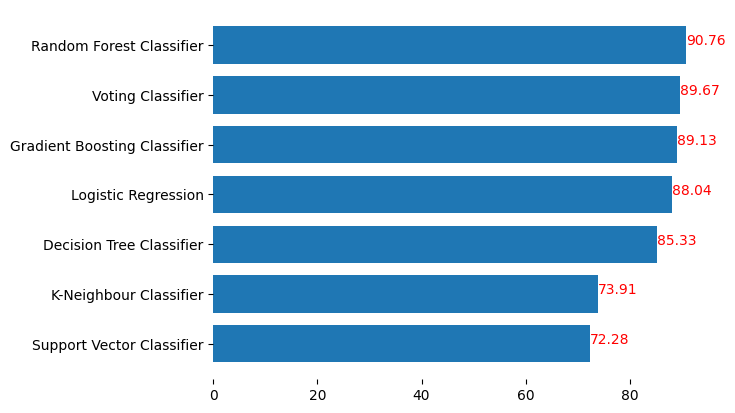

In [73]:
classifiers = sorted(classifiers, key=lambda a: a[3])
fig, ax=plt.subplots()
xaxis_name = [x[0] for x in classifiers]
values = [x[3]*100 for x in classifiers]

ax.barh(xaxis_name, values, 0.75)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

for i, v in enumerate(values):
    ax.text(v,i, str(round(v, 2)), 
            color = 'red')
    
plt.show()

In [74]:
cv_results = {}
for classifier in classifiers:
    name, model = classifier[0], classifier[1]
    scores = cross_val_score(model, X_train, y_train, cv=5)
    cv_results[name] = {
        'mean_accuracy': np.mean(scores),
        'std_accuracy': np.std(scores)
    }

import pandas as pd
cv_results_data = pd.DataFrame(cv_results).T
cv_results_data

,mean_accuracy,std_accuracy
Support Vector Classifier,0.706691,0.009390
K-Neighbour Classifier,0.723064,0.031480
Decision Tree Classifier,0.825328,0.024549
Logistic Regression,0.851225,0.035411
Gradient Boosting Classifier,0.860814,0.026920
Voting Classifier,0.866247,0.029025
Random Forest Classifier,0.868968,0.032033
